In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [58]:
df =pd.read_csv('train_2v.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [132]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [60]:
df.shape

(43400, 12)

In [62]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [63]:
# replaced nan bmi values with bmi.mean()
df['bmi'].fillna(df.bmi.mean()).head()

0    18.0
1    39.2
2    17.6
3    35.9
4    19.1
Name: bmi, dtype: float64

In [64]:
df.stroke.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [65]:
df.gender.value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [17]:
# replaced "Other" in gender with Female
df = df.replace(df['gender'] == 'Other', 'Female', inplace = True)

In [92]:
df1 = df[['gender', 'stroke']]
df1.stroke.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

Gender Impact on risk of having Stroke

In [131]:
# find the number of male, female with and without stroke respectively:
num_female_stroke = len(df1[(df1['gender']== 'Female') & (df1['stroke']==1)])
num_males_stroke = len(df1[(df1['gender']== 'Male') & (df1['stroke']==1)])
num_female_no_stroke = len(df1[(df1['gender']== 'Female') & (df1['stroke']== 0)])
num_males_no_stroke = len(df1[(df1['gender']== 'Male') & (df1['stroke']==0)])
print(num_female_stroke,num_males_stroke, num_female_no_stroke,num_males_no_stroke)

431 352 25234 17372


<BarContainer object of 4 artists>

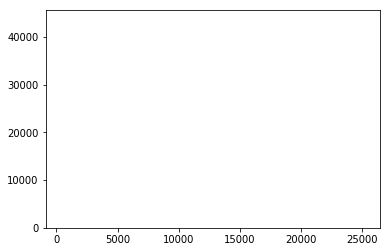

In [144]:
x = [num_female_stroke,num_males_stroke,num_female_no_stroke,num_males_no_stroke]
y = len(df1.stroke)
plt.bar(x,y)

#plt.plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)

In [66]:
df.hypertension.value_counts()

0    39339
1     4061
Name: hypertension, dtype: int64

In [12]:
df.heart_disease.value_counts()

0    41338
1     2062
Name: heart_disease, dtype: int64

In [67]:
df.smoking_status.value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [68]:
df.groupby(['avg_glucose_level']).mean().head()

,id,age,hypertension,heart_disease,bmi,stroke
avg_glucose_level,,,,,,
55.00,44547.000000,4.000000,0.000000,0.0,18.900000,0.0
55.01,54743.800000,39.800000,0.000000,0.2,31.160000,0.2
55.02,47048.000000,41.000000,0.000000,0.0,28.700000,0.0
55.03,43528.166667,50.666667,0.166667,0.0,28.133333,0.0
55.04,52653.600000,38.600000,0.000000,0.2,34.180000,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [69]:
df.groupby('stroke').size()

stroke
0    42617
1      783
dtype: int64

In [77]:
no_stroked = len(df[df['stroke'] == 0])
stroked = len(df[df['stroke'] == 1])
no_stroked

42617